In [84]:
import pandas as pd
from pathlib import Path
import missingno as msno
import matplotlib.pyplot as plt


In [85]:
# Define the relative path to the CSV file
relative_path = Path(f'../data/raw/bndes_despesas_viagens.csv')

# Load the CSV file using the relative path
df = pd.read_csv(relative_path, sep=',')

df.head(5)

C:\Users\acer\AppData\Local\Temp\ipykernel_28348\1095147917.py:5: DtypeWarning: Columns (19,21,22,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(relative_path, sep=',')


,_id,codigoviagem,codigoorgao,tipoorgao,unidadegestora,codigoorgaosuperior,cpfservidor,nomeservidor,cargo,datapartidaorigem,...,categoriapassagem,valorpassagem,motivoviagem,numerodiarias,valordiariastrecho,valortotalviagemptpbndes,valoracrescimosdeducoes,valortotalhospedagem,valortotallocacao,datagravacao
0,1,202020010,45282,2,201014,28000,***.894.946-**,Mariana de Oliveira Martins Gago,8,31/12/2020 07:00,...,3,"674,38",OUTROS,0,0,"674,38",0,0,0,10/05/2021 11:14
1,2,202020009,45282,2,201014,28000,***.951.917-**,RENATO ARAUJO DE FREITAS GAGO,8,31/12/2020 07:00,...,3,"674,38",OUTROS,0,0,"674,38",0,0,0,10/05/2021 11:14
2,3,202425168,45282,2,201014,28000,***.412.007-**,LUIZ ANTONIO PAZOS MORAES,8,31/10/2024 21:20,...,3,"0,00",REUNIÃO EM ÓRGÃOS GOVERNAMENTAIS,"0,00","0,00","3.995,13","0,00","0,00","0,00",14/02/2025 12:26
3,4,202424992,45282,2,201014,28000,***.171.216-**,LEANDRO AVILA VIEIRA,8,31/10/2024 20:15,...,3,"0,00",ACOMPANHAMENTO DE PROJETO,"0,00","0,00","4.415,43","0,00","0,00","0,00",14/02/2025 12:26
4,5,202425304,45282,2,201014,28000,***.097.427-**,ANA CRISTINA RODRIGUES DA COSTA,23,31/10/2024 20:35,...,3,"0,00","PARTICIPAÇÃO EM CONGRESSOS, FEIRAS E SEMINÁRIOS","0,00","0,00","6.262,46","0,00","0,00","0,00",14/02/2025 12:26


In [86]:
print("Este dataset tem {} linhas e {} colunas".format(df.shape[0], df.shape[1]))

Este dataset tem 279090 linhas e 28 colunas


In [87]:
df_nulls = df.isnull().mean() * 100
df_nulls_sorted = df_nulls.sort_values(ascending=False)
df_nulls_sorted.head(10)

datachegadadestino     1.044824
motivoviagem           0.002150
codigoorgao            0.000000
_id                    0.000000
tipoorgao              0.000000
unidadegestora         0.000000
cpfservidor            0.000000
codigoorgaosuperior    0.000000
nomeservidor           0.000000
cargo                  0.000000
dtype: float64

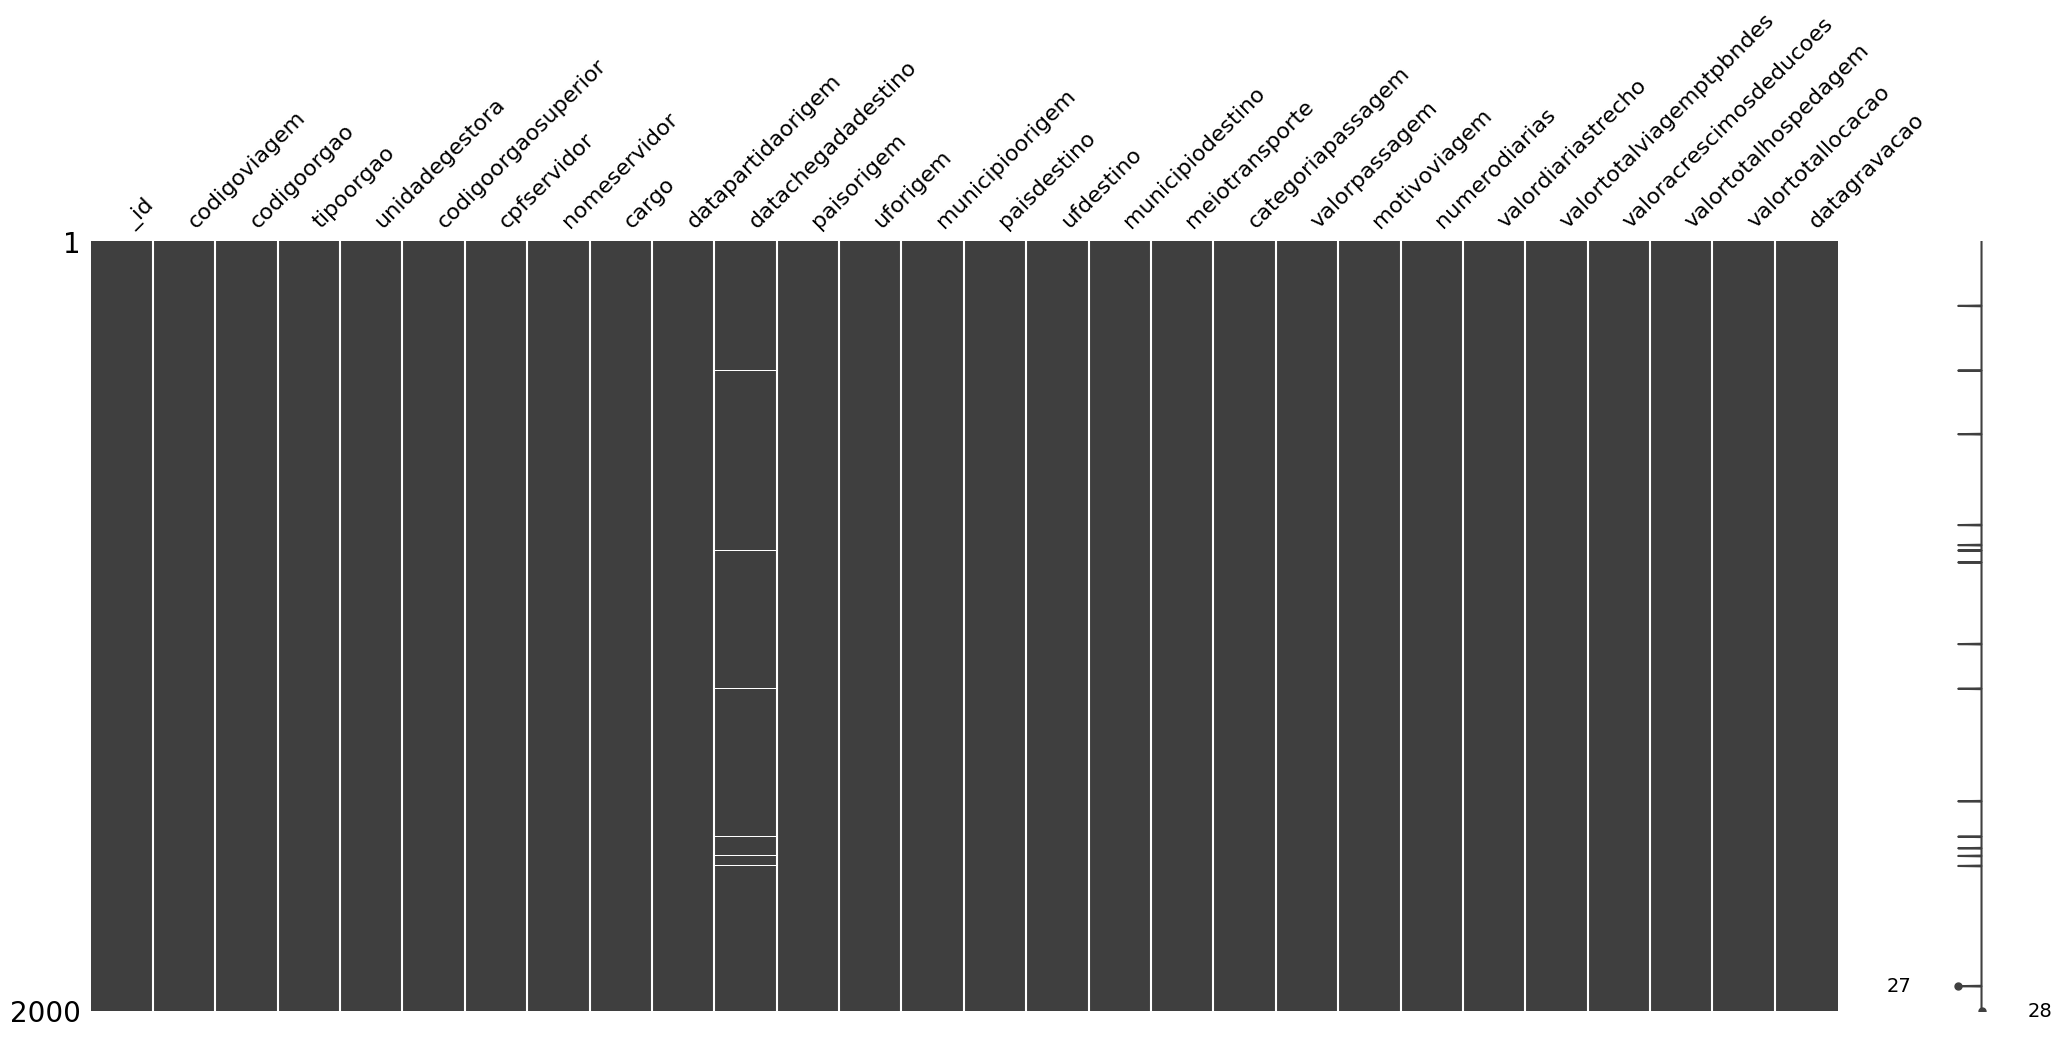

In [88]:
ax = msno.matrix(df.sample(2000))
ax.get_figure().savefig('../reports/figures/missing_values_matrix.png')

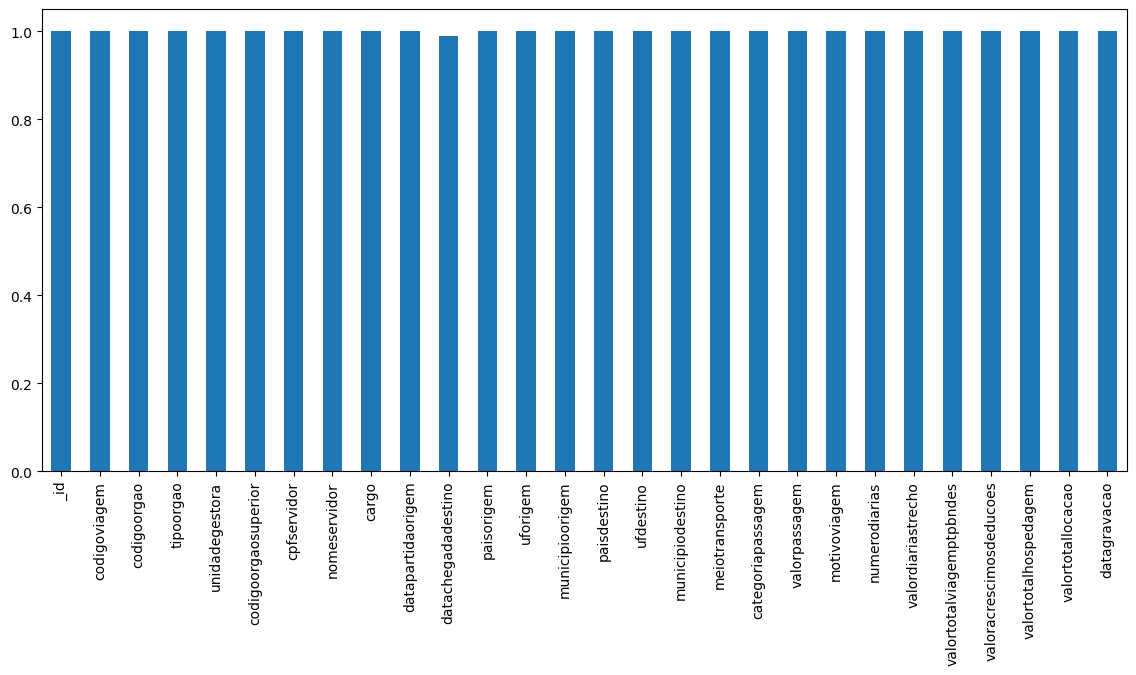

In [89]:
fig, ax = plt.subplots(figsize=(14, 6))
(1-df.isnull().mean()).plot.bar(ax=ax)
fig.savefig('../reports/figures/missing_values_bar_pandas.png')

In [90]:
df_sem_nulos = df.dropna()
print("Este dataset com a remoção de nulos agora tem {} linhas e {} colunas".format(df_sem_nulos.shape[0], df_sem_nulos.shape[1]))

Este dataset com a remoção de nulos agora tem 276168 linhas e 28 colunas


In [91]:
df_sem_nulos.columns = df_sem_nulos.columns.str.lower().str.replace(' ', '_')

In [92]:
def converter_valores_brasileiros(df, colunas):
    """
    Converte colunas com valores no formato brasileiro (ex: 1.234,56) para float padrão Python.

    Parâmetros:
    - df: DataFrame Pandas
    - colunas: lista com os nomes das colunas a serem convertidas
    """
    for col in colunas:
        df[col] = (
            df[col]
            .astype(str)                           # garante string
            .str.replace('.', '', regex=False)     # remove separador de milhar
            .str.replace(',', '.', regex=False)    # substitui vírgula decimal
            .str.strip()                           # remove espaços extras
        )
        df[col] = pd.to_numeric(df[col], errors='coerce')  # converte para float
    return df


In [99]:
df_formatado = converter_valores_brasileiros(df_sem_nulos, ['numerodiarias','valorpassagem', 'valordiariastrecho', 'valortotalhospedagem', 'valortotallocacao', 'valortotalviagemptpbndes'])

C:\Users\acer\AppData\Local\Temp\ipykernel_28348\763897471.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = (
C:\Users\acer\AppData\Local\Temp\ipykernel_28348\763897471.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')  # converte para float
C:\Users\acer\AppData\Local\Temp\ipykernel_28348\763897471.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [100]:
df_formatado.describe()

,_id,codigoviagem,codigoorgao,tipoorgao,unidadegestora,codigoorgaosuperior,cargo,paisorigem,municipioorigem,paisdestino,municipiodestino,meiotransporte,categoriapassagem,valorpassagem,numerodiarias,valordiariastrecho,valortotalviagemptpbndes,valortotalhospedagem,valortotallocacao
count,276168.000000,2.761680e+05,276168.0,276168.0,276168.0,276168.0,276168.000000,276168.000000,276168.000000,276168.000000,276168.000000,276168.000000,276168.000000,2.761680e+05,276168.000000,2.761680e+05,2.761680e+05,276168.000000,276168.000000
mean,138087.038183,2.014999e+08,45282.0,2.0,201014.0,28000.0,3550.991983,1.692629,6395.554637,1.681219,6388.363427,1.967404,2.900763,3.452459e+05,900.534436,2.161429e+04,1.146756e+06,1535.047688,378.660645
std,79724.764624,4.299240e+05,0.0,0.0,0.0,0.0,4383.131010,10.520409,2119.686418,10.421535,2132.750806,0.177577,0.534433,4.234788e+05,1306.286208,6.019492e+04,8.053684e+05,12007.646383,7545.323059
min,1.000000,2.009000e+08,45282.0,2.0,201014.0,28000.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,69044.750000,2.012004e+08,45282.0,2.0,201014.0,28000.0,34.000000,1.000000,6001.000000,1.000000,6001.000000,2.000000,3.000000,0.000000e+00,0.000000,0.000000e+00,6.327400e+05,0.000000,0.000000
50%,138086.500000,2.014092e+08,45282.0,2.0,201014.0,28000.0,34.000000,1.000000,6001.000000,1.000000,6001.000000,2.000000,3.000000,2.452200e+05,0.000000,0.000000e+00,1.093470e+06,0.000000,0.000000
75%,207128.250000,2.018012e+08,45282.0,2.0,201014.0,28000.0,9003.000000,1.000000,7107.000000,1.000000,7107.000000,2.000000,3.000000,4.957200e+05,2000.000000,3.400000e+04,1.533560e+06,0.000000,0.000000
max,276174.000000,2.025800e+08,45282.0,2.0,201014.0,28000.0,9999.000000,203.000000,9925.000000,203.000000,9925.000000,2.000000,3.000000,1.687113e+07,30000.000000,3.279129e+06,4.069466e+07,574692.000000,894892.000000


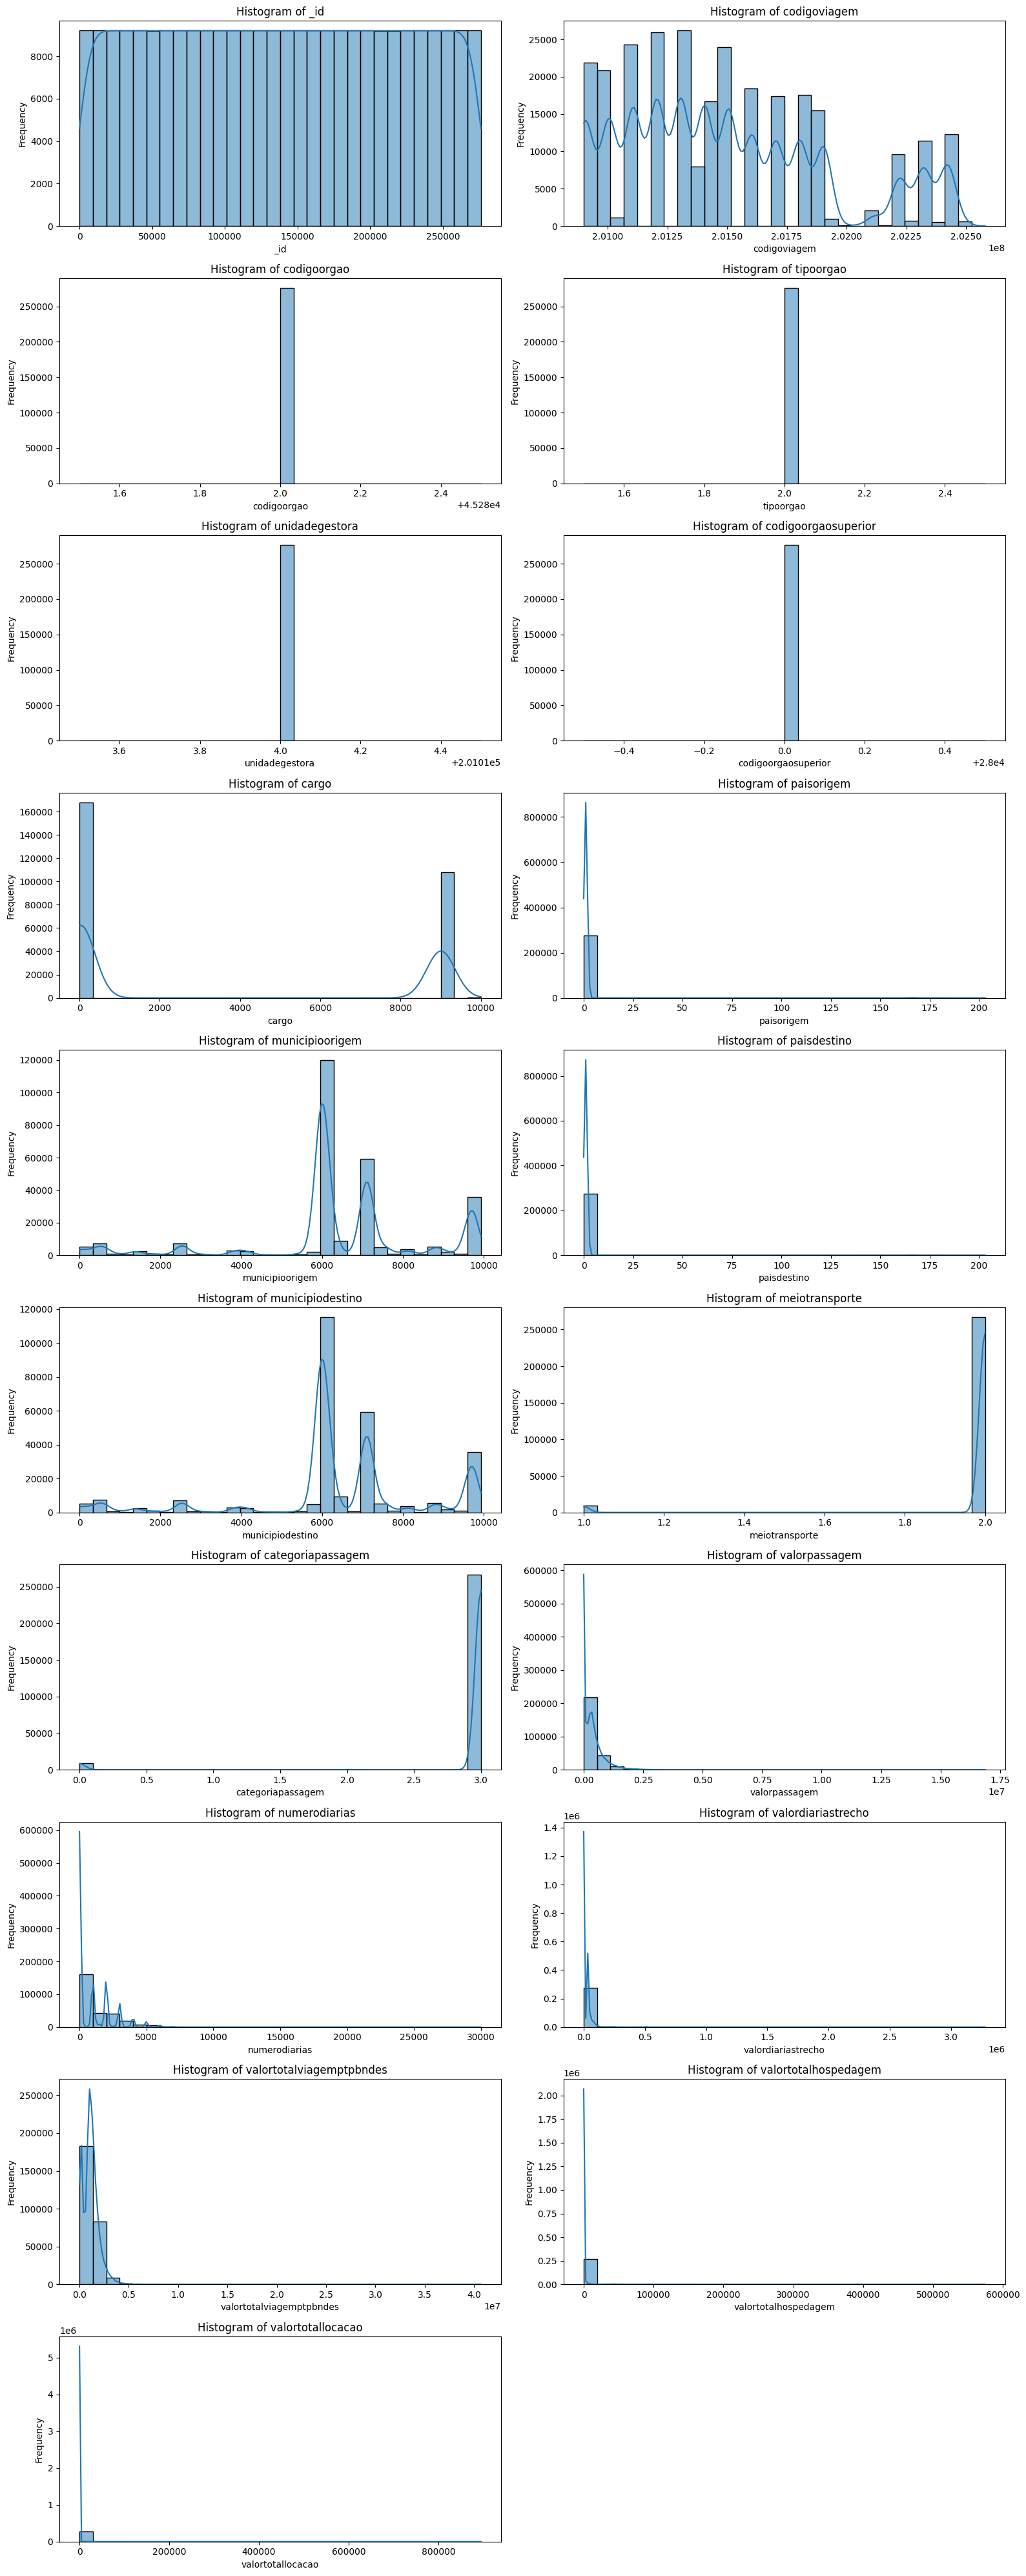

In [105]:
import seaborn as sns

# Define the number of columns for the layout
ncols = 2
nrows = (len(numeric_columns) + ncols - 1) // ncols  # Calculate the number of rows needed

# Create a figure with subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, nrows * 4))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each numeric column in a separate subplot
for ax, col in zip(axes, numeric_columns):
    sns.histplot(df_formatado[col], kde=True, bins=30, ax=ax)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for ax in axes[len(numeric_columns):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

fig.savefig('../reports/figures/hist_all_numeric_columns.png')